In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [2]:
zero = np.array([
   -1,1,1,1,-1,
    1,-1,-1,-1,1,
    1,-1,-1,-1,1,
    1,-1,-1,-1,1,
    1,-1,-1,-1,1,
    1,-1,-1,-1,1,
    -1,1,1,1,-1
])

one = np.array([
    -1,-1,1,-1,-1,
    -1,1,1,-1,-1,
    -1,-1,1,-1,-1,
    -1,-1,1,-1,-1,
    -1,-1,1,-1,-1,
    -1,-1,1,-1,-1,
    -1,1,1,1,-1
])

two = np.array([
    -1,1,1,1,-1,
    1,-1,-1,-1,1,
    -1,-1,-1,-1,1,
    -1,1,1,1,-1,
    1,-1,-1,-1,-1,
    1,-1,-1,-1,-1,
    1,1,1,1,1
                
])

In [3]:
class Hebbian:
    def __init__(self, _S, _T):
        self.S = _S
        self.T = _T
        self.W = np.zeros((len(_S[1]), len(_T[1])))
        
    def train(self):
        for trainSample in range(len(self.S)):
            x = self.S[trainSample]
            y = self.T[trainSample]
            for i in range(len(x)):
                for j in range(len(y)):
                    self.W[i][j] = self.W[i][j] + x[i]*y[j]
    def showResult(self, X):
        y_t = np.dot(X,self.W)
        for i in range(len(y_t)): #sign
            if(y_t[i] >= 0):
                y_t[i] = 1
            else:
                y_t[i] = -1
        plt.figure()
        plt.imshow(y_t.reshape((7, 5)), cmap='binary')                   

In [4]:
S = np.array([copy.deepcopy(zero), copy.deepcopy(one), copy.deepcopy(two)])
T = np.array([copy.deepcopy(zero), copy.deepcopy(one), copy.deepcopy(two)])
heb = Hebbian(S, T)
heb.train()

**Part 1**

Weights of Hebbian Learning Rule

In [5]:
heb.W

array([[ 3., -1., -3., ..., -3., -3.,  1.],
       [-1.,  3.,  1., ...,  1.,  1.,  1.],
       [-3.,  1.,  3., ...,  3.,  3., -1.],
       ...,
       [-3.,  1.,  3., ...,  3.,  3., -1.],
       [-3.,  1.,  3., ...,  3.,  3., -1.],
       [ 1.,  1., -1., ..., -1., -1.,  3.]])

**Part 2**

**The input and expected output image**

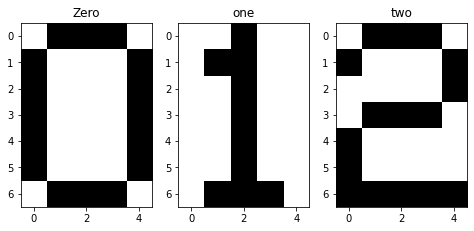

In [6]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(zero.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('Zero')
fig.add_subplot(1, 3, 2)
plt.imshow(one.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('one')
fig.add_subplot(1, 3, 3)
plt.imshow(two.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('two')
plt.show()

**image of network output**

**The model accuracy is 100%**

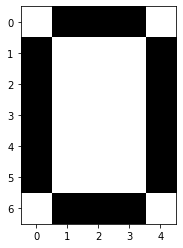

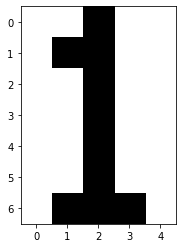

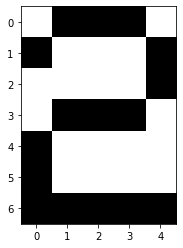

In [7]:
heb.showResult(zero)
heb.showResult(one)
heb.showResult(two)

**Part 3**

In [8]:
def ResultWhitNoise(arr,percentage):
    pixels = int(np.prod(arr.shape)*percentage)
    with_noise = np.copy(arr)
    for pixel in range(pixels) :
      random_pixel = np.random.choice(np.prod(with_noise.shape), 1)
      if with_noise.flat[random_pixel] == -1 :
        with_noise.flat[random_pixel] = 1
      else:
        with_noise.flat[random_pixel] = -1
    
    return with_noise

In [9]:
zero_noise_20 = ResultWhitNoise(zero,0.2)
one_noise_20  = ResultWhitNoise(one,0.2)
two_noise_20  = ResultWhitNoise(two,0.2)

**The input image with 20% noise**

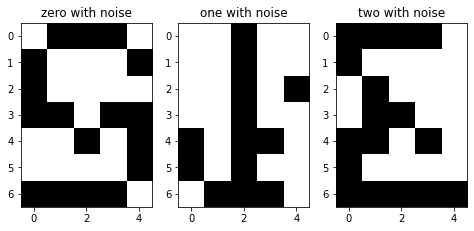

In [10]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(zero_noise_20.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('zero with noise')
fig.add_subplot(1, 3, 2)
plt.imshow(one_noise_20.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('one with noise')
fig.add_subplot(1, 3, 3)
plt.imshow(two_noise_20.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('two with noise')
plt.show()

In [11]:
S = np.array([copy.deepcopy(zero), copy.deepcopy(one), copy.deepcopy(two)])
T = np.array([copy.deepcopy(zero), copy.deepcopy(one), copy.deepcopy(two)])
heb2 = Hebbian(S, T)
heb2.train()

**The output and expected output image with 20% noise**

**accuracy is 100%**

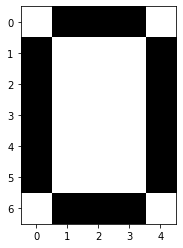

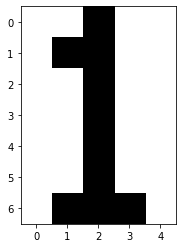

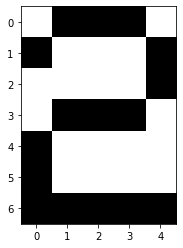

In [12]:
heb2.showResult(zero_noise_20)
heb2.showResult(one_noise_20)
heb2.showResult(two_noise_20)

In [20]:
zero_noise_80 = ResultWhitNoise(zero,0.8)
one_noise_80  = ResultWhitNoise(one,0.8)
two_noise_80  = ResultWhitNoise(two,0.8)

**The input image with 80% noise**

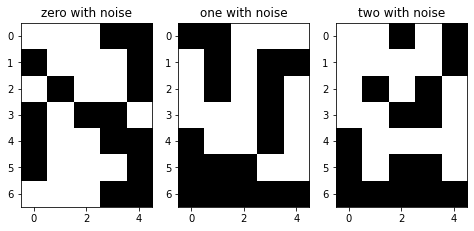

In [21]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(zero_noise_80.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('zero with noise')
fig.add_subplot(1, 3, 2)
plt.imshow(one_noise_80.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('one with noise')
fig.add_subplot(1, 3, 3)
plt.imshow(two_noise_80.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('two with noise')
plt.show()

**The expected output image**

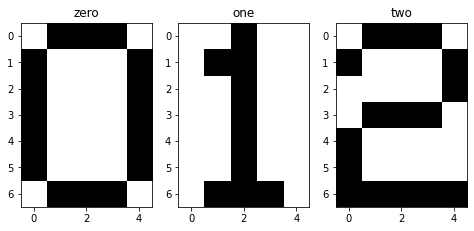

In [22]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(zero.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('zero')
fig.add_subplot(1, 3, 2)
plt.imshow(one.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('one')
fig.add_subplot(1, 3, 3)
plt.imshow(two.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('two')
plt.show()

In [23]:
S = np.array([copy.deepcopy(zero), copy.deepcopy(one), copy.deepcopy(two)])
T = np.array([copy.deepcopy(zero), copy.deepcopy(one), copy.deepcopy(two)])
heb3 = Hebbian(S, T)
heb3.train()

**The network output image with 80% noise**

**accuracy is 33.3**

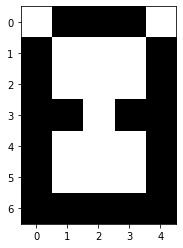

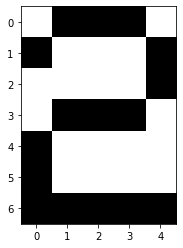

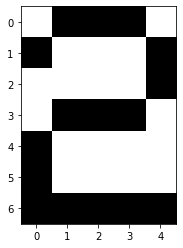

In [24]:
heb3.showResult(zero_noise_80)
heb3.showResult(one_noise_80)
heb3.showResult(two_noise_80)

**Edit distance is a way of quantifying how dissimilar two strings (e.g., words) are to one another by counting the minimum number of operations required to transform one string into the other**

**Due to the function output and output from the network number one has the highest sensitivity among other numbers**

In [27]:
def edit_distance(list1, list2):
    difference = 0
    for i in range(len(list1)):
        if list1[i] != list2[i]:
            difference += 1

    return difference

print(edit_distance(zero,zero_noise_80 ))
print(edit_distance(one,one_noise_80 ))
print(edit_distance(two,two_noise_80 ))


12
18
10


**Part 4**

In [28]:
def showResultWithLost(arr,percentage):
    pixels = int(np.prod(arr.shape)*percentage)
    with_noise = np.copy(arr)
    for pixel in range(pixels) :
      random_pixel = np.random.choice(np.prod(with_noise.shape), 1)
      with_noise.flat[random_pixel] = 0
    return with_noise

In [29]:
zero_loss_20 = showResultWithLost(zero, 0.2)
one_loss_20 = showResultWithLost(one, 0.2)
two_loss_20 = showResultWithLost(two, 0.2)

**The input image with 20% loss**

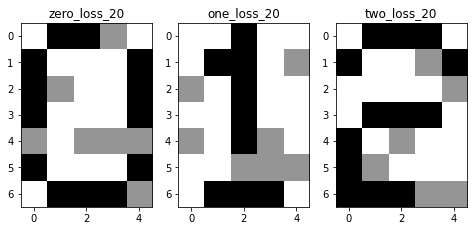

In [41]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(zero_loss_20.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('zero_loss_20')
fig.add_subplot(1, 3, 2)
plt.imshow(one_loss_20.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('one_loss_20')
fig.add_subplot(1, 3, 3)
plt.imshow(two_loss_20.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('two_loss_20')
plt.show()

**The expected output image**

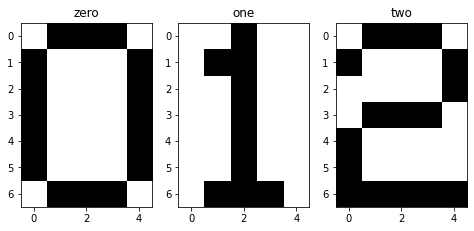

In [31]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(zero.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('zero')
fig.add_subplot(1, 3, 2)
plt.imshow(one.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('one')
fig.add_subplot(1, 3, 3)
plt.imshow(two.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('two')
plt.show()

In [32]:
S = np.array([copy.deepcopy(zero), copy.deepcopy(one), copy.deepcopy(two)])
T = np.array([copy.deepcopy(zero), copy.deepcopy(one), copy.deepcopy(two)])
heb4 = Hebbian(S, T)
heb4.train()

**The network output image**

**accuracy is 100%**

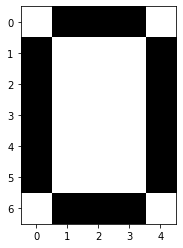

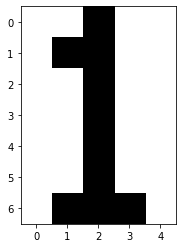

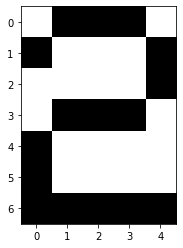

In [33]:
heb4.showResult(zero_loss_20)
heb4.showResult(one_loss_20)
heb4.showResult(two_loss_20)

In [42]:
zero_loss_80 = showResultWithLost(zero, 0.8)
one_loss_80 = showResultWithLost(one, 0.8)
two_loss_80 = showResultWithLost(two, 0.8)

**The input image with 80% loss**

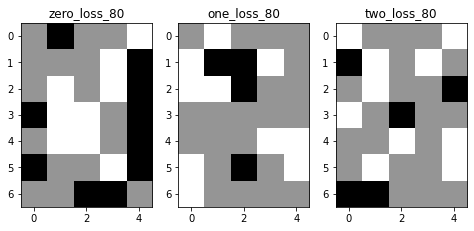

In [37]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(zero_loss_80.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('zero_loss_80')
fig.add_subplot(1, 3, 2)
plt.imshow(one_loss_80.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('one_loss_80')
fig.add_subplot(1, 3, 3)
plt.imshow(two_loss_80.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('two_loss_80')
plt.show()

**The expected output image**

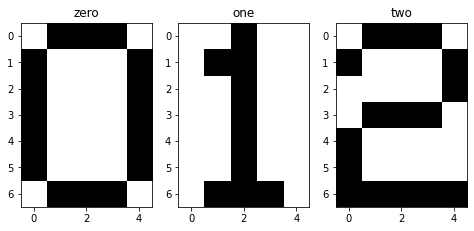

In [38]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(zero.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('zero')
fig.add_subplot(1, 3, 2)
plt.imshow(one.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('one')
fig.add_subplot(1, 3, 3)
plt.imshow(two.reshape((7, 5)), interpolation='nearest',cmap='Greys')
plt.title('two')
plt.show()

In [43]:
S = np.array([copy.deepcopy(zero), copy.deepcopy(one), copy.deepcopy(two)])
T = np.array([copy.deepcopy(zero), copy.deepcopy(one), copy.deepcopy(two)])
heb5 = Hebbian(S, T)
heb5.train()

**The image of network output**

**accuracy is 100%**

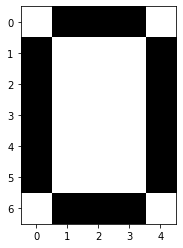

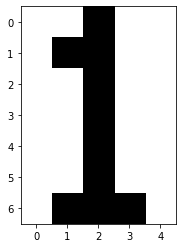

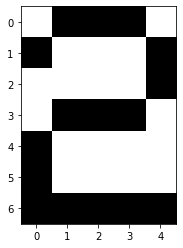

In [44]:
heb5.showResult(zero_loss_80)
heb5.showResult(one_loss_80)
heb5.showResult(two_loss_80)